# Notebook d'analyse du dataset qui servira à la modélisation

## Introduction

## Chargement des données

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

### Chargement des variables d'environnement

In [7]:
# Charger les variables d'environnement à partir du fichier .env
load_dotenv()

# Utiliser les variables d'environnement pour les paramètres de connexion
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
user = os.getenv("AZUREUSER")
password = os.getenv("PASSWORD")

### Connexion à la base de données

In [8]:
# Créer la chaîne de connexion
azure_connection_string = f"mssql+pyodbc://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"

# Créer le moteur SQLAlchemy
engine = create_engine(azure_connection_string)

### Chargement du dataset CleanDataset

In [9]:
df = pd.read_sql_query("SELECT * FROM CleanDataset", engine)

## Analyse exploratoire des données

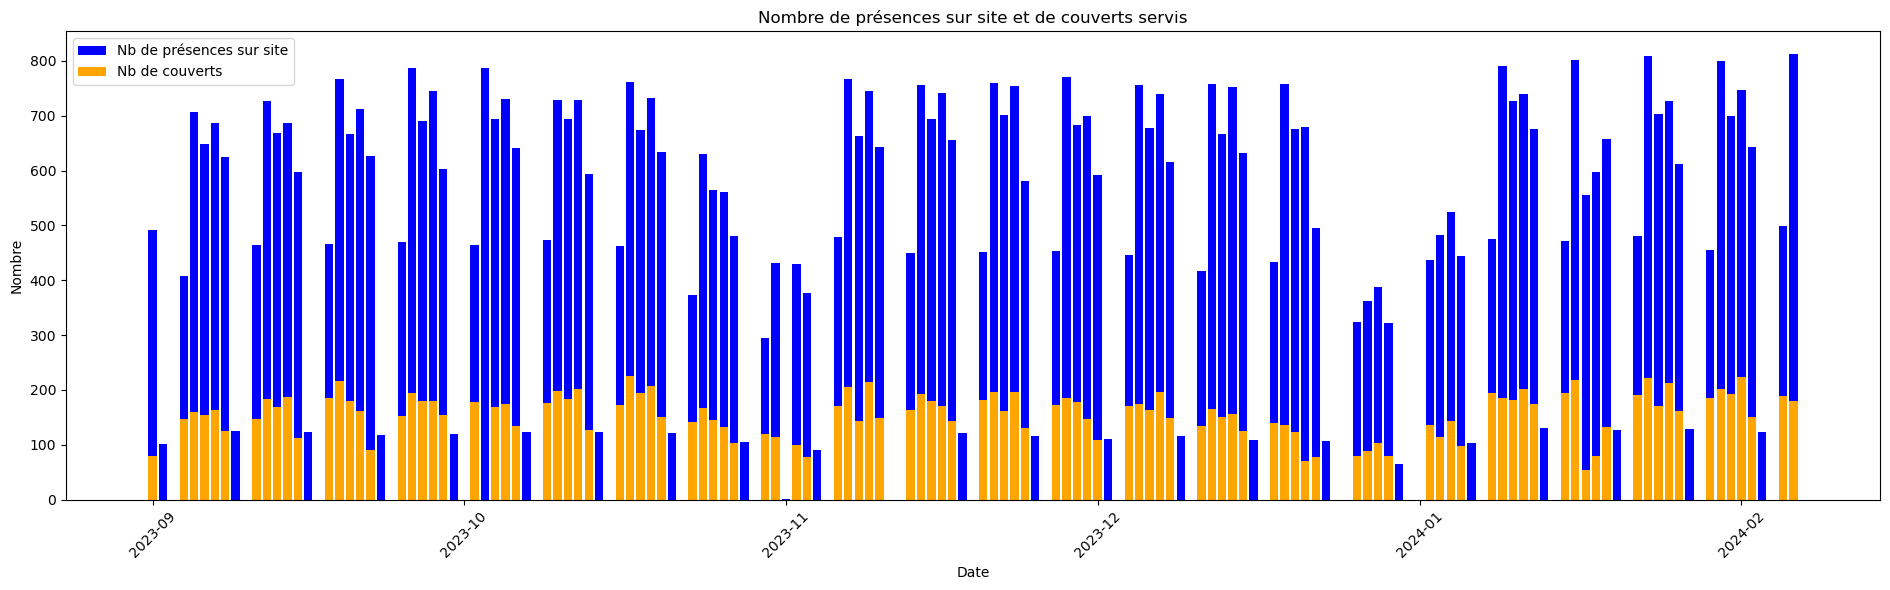

In [10]:
# Extraire les données de la DataFrame
dates = df['id_jour']
nb_presence_sur_site = df['nb_presence_sur_site']
nb_couverts = df['nb_couvert']

# Créer le graphique en barres
plt.figure(figsize=(19, 6))

# Barres pour le nombre de présences sur site (en bleu)
plt.bar(dates, nb_presence_sur_site, color='blue', label='Nb de présences sur site')

# Barres pour le nombre de couverts (en orange)
plt.bar(dates, nb_couverts, color='orange', label='Nb de couverts')

# Ajouter des étiquettes et légendes
plt.xlabel('Date')
plt.ylabel('Nombre')
plt.title('Nombre de présences sur site et de couverts servis')
plt.xticks(rotation=45)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()